## Warmups

In [ ]:
# Warmup 0: Recall how to read in and use json data

import json
# we are going to learn about this today !
from collections import namedtuple

# Deserialize
def read_json(path):
    with open(path, encoding="utf-8") as f: # f is a variable 
        return json.load(f)                 # f represents a reference the JSON file
    
# Serialize
def write_json(path, data):
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=2)

kiva_dict = read_json('kiva.json')
loan_list = kiva_dict['data']['lend']['loans']['values'] # this gives us a list of dicts
loan_list[0].keys()

In [ ]:
# Warmup 1a: What is the total amount needed to fund all of the loans?


In [ ]:
# Warmup 1b: What are the unique countries of origin in alphabetical order?


In [4]:
# Warmup 2: Explain what the code below does
x = 1

# CS220: Lecture 20


## Learning Objectives
After this lecture you will be able to...
- Explain the difference between objects vs references, and stack vs heap.
- Determine the side effects that occur when modifying parameters.
- Use tuples to store immutable sequences of values.
- Use namedtuple (immutable) to store user-defined data objects.


### Objects vs References & Stack vs Heap

- Check out the slides!
- Try some of the code in PythonTutor

In [6]:
# Warmup 2: Explain what the code below does
x = 1

In [10]:
# Warmup 2b: Explain what the code below does
shelf = ["sugar", "coffee"]

### Determine the side effects that occur when modifying parameters.


Example 1a [PythonTutor Link](https://pythontutor.com/visualize.html#code=def%20f%28x%29%3A%0A%20%20%20%20x%20*%3D%203%0A%20%20%20%20print%28%22f%3A%22,%20x%29%0A%0Anum%20%3D%2010%0Aprint%28%22before%3A%22,%20num%29%0Af%28num%29%0Aprint%28%22after%3A%22,%20num%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [14]:
def f(x):
    x *= 3
    print("f:", x)

num = 10
print("before:", num)
f(num)
print("after:", num)

# Takeaway: What happens when a parameter is reassigned in a function?

before: 10
f: 30
after: 10


Example 1b, [PythonTutor Link](https://pythontutor.com/visualize.html#code=def%20f%28items%29%3A%0A%20%20%20%20items.append%28%22donuts%22%29%0A%20%20%20%20print%28%22f%3A%22,%20items%29%0A%0Awords%20%3D%20%5B'sugar',%20'coffee'%5D%0Aprint%28%22before%3A%22,%20words%29%0Af%28words%29%0Aprint%28%22after%3A%22,%20words%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [15]:
def f(items):
    items.append("donuts")
    print("f:", items)

words = ['sugar', 'coffee']
print("before:", words)
f(words)
print("after:", words)

# Takeaway: What happens when a list parameter is mutated in a function?

before: ['sugar', 'coffee']
f: ['sugar', 'coffee', 'donuts']
after: ['sugar', 'coffee', 'donuts']


Example 1c [PythonTutor Link](https://pythontutor.com/visualize.html#code=def%20f%28items%29%3A%0A%20%20%20%20items%20%3D%20items%20%2B%20%5B%22donuts%22%5D%0A%20%20%20%20print%28%22f%3A%22,%20items%29%0A%0Awords%20%3D%20%5B'sugar',%20'coffee'%5D%0Aprint%28%22before%3A%22,%20words%29%0Af%28words%29%0Aprint%28%22after%3A%22,%20words%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [16]:
def f(items):
    items = items + ["donuts"]
    print("f:", items)

words = ['sugar', 'coffee']
print("before:", words)
f(words)
print("after:", words)

# Takeaway: What happens when a list parameter is reassigned?

before: ['sugar', 'coffee']
f: ['sugar', 'coffee', 'donuts']
after: ['sugar', 'coffee']


Example 1d [PythonTutor Link](https://pythontutor.com/visualize.html#code=def%20first%28items%29%3A%0A%20%20%20%20return%20items%5B0%5D%0A%0Adef%20smallest%28items%29%3A%0A%20%20%20%20items.sort%28%29%0A%20%20%20%20return%20items%5B0%5D%0A%0Anumbers%20%3D%20%5B4,5,3,2,1%5D%0Aprint%28%22first%3A%22,%20first%28numbers%29%29%0Aprint%28%22smallest%3A%22,%20smallest%28numbers%29%29%0Aprint%28%22first%3A%22,%20first%28numbers%29%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [17]:
def first(items):
    return items[0]

def smallest(items):
    items.sort()
    return items[0]

numbers	= [4,5,3,2,1]
print("first:", first(numbers))
print("smallest:", smallest(numbers))
print("first:", first(numbers))

# Takeaway: What happens when a list parameter is sorted "in place" using .sort() ?

first: 4
smallest: 1
first: 1


Example 1e [PythonTutor Link](https://pythontutor.com/visualize.html#code=def%20first%28items%29%3A%0A%20%20%20%20return%20items%5B0%5D%0A%0Adef%20smallest%28items%29%3A%0A%20%20%20%20items%20%3D%20sorted%28items%29%0A%20%20%20%20return%20items%5B0%5D%0A%0Anumbers%20%3D%20%5B4,5,3,2,1%5D%0Aprint%28%22first%3A%22,%20first%28numbers%29%29%0Aprint%28%22smallest%3A%22,%20smallest%28numbers%29%29%0Aprint%28%22first%3A%22,%20first%28numbers%29%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [18]:
def first(items):
    return items[0]

def smallest(items):
    items = sorted(items)
    return items[0]

numbers = [4,5,3,2,1]
print("first:", first(numbers))
print("smallest:", smallest(numbers))
print("first:", first(numbers))

# Takeaway: What happens when a list parameter is sorted using sorted()? 

first: 4
smallest: 1
first: 4


In [19]:
# What can we say about the last two examples?


In [20]:
# Write one good thing about lists being mutable:


In [21]:
# Write one bad thing about lists being mutable:


## Your Turn!

Explain how the below code works.

In [22]:
def add_vacation_plan(itinerary, location, plan):
    if location not in itinerary:
        itinerary[location] = []
    itinerary[location].append(plan)
    
def get_vacation_plans(itinerary, location):
    if location not in itinerary:
        return []
    return itinerary[location]
    
alices_vacay = {}
bobs_vacay = {}

add_vacation_plan(alices_vacay, "Malibu", "Swimming")
add_vacation_plan(alices_vacay, "San Diego", "Touring")
add_vacation_plan(alices_vacay, "San Diego", "Shopping")

add_vacation_plan(bobs_vacay, "Madison", "Studying")
add_vacation_plan(bobs_vacay, "HWY 151", "Driving")
add_vacation_plan(bobs_vacay, "Devils Lake", "Swimming")
add_vacation_plan(bobs_vacay, "Devils Lake", "Kayaking")
add_vacation_plan(bobs_vacay, "Devils Lake", "Hiking")

print(alices_vacay)
print(bobs_vacay)
print(get_vacation_plans(alices_vacay, 'San Diego'))
print(get_vacation_plans(bobs_vacay, 'Seattle'))

{'Malibu': ['Swimming'], 'San Diego': ['Touring', 'Shopping']}
{'Madison': ['Studying'], 'HWY 151': ['Driving'], 'Devils Lake': ['Swimming', 'Kayaking', 'Hiking']}
['Touring', 'Shopping']
[]


### Use tuples to store immutable sequences of values.
Check out the slides about tuples

In [23]:
# Tuples are like lists BUT are IMMUTABLE

# practice with tuples
scores = [32, 55, 72, 91]   # a list is mutable
coordinates = (-3, 4, 7)    # a tuple is not mutable

In [24]:
# show that scores is mutable
scores[-1] = 100
print(scores)

# show that tuples are immutable
#coordinates[-1] = 100.   #tuple not mutable
#print(coordinates)

[32, 55, 72, 100]


In [25]:
coordinates = (5, 77, -3)   # However, re-assignment is OK
print(coordinates)

(5, 77, -3)


In [26]:
scores_tuple = tuple(scores) # you can convert a list into a tuple
print(scores_tuple)

(32, 55, 72, 100)


In [27]:
# Question:  Can tuples be sorted?
# Discuss with your neighbor

In [28]:
# reference:  https://www.w3schools.com/python/python_tuples.asp

In [29]:

# Why use tuples? 
#     keys in dictionaries must be immutable types
#     some data never changes : GPS coordinates

# Fails with TypeError
buildings = {
    [0,0]: "Comp Sci",
    [0,2]: "Psychology",
    [4,0]: "Noland",
    [1,8]: "Van Vleck" }

TypeError: unhashable type: 'list'

In [30]:
# Works with tuple as keys
buildings = {
    (0,0): "Comp Sci",
    (0,2): "Psychology",
    (4,0): "Noland",
    (1,8): "Van Vleck" }

# find the name of the building at coordinate (4,0)


'Noland'

### 21.3 Use namedtuple (immutable) to store user-defined data objects.
- namedtuple is useful for creating well-defined objects
- namedtuple is like a mix of tuples and dictionaries
- let's look at the slides



In [31]:
people = []

# A namedtuple is like its own kind of type!
# its a Python convention to use a Capital letter when naming a namedtuple
# define a namedtuple called Person
Person = namedtuple("Person", ["fname", "lname", "age"])

# make a single person....please don't name it person !!

# Add another Person by using keyword arguments 


124


In [32]:
# make a list of Persons
people=[
    Person("Alice", "Anderson", 30),  # positional arguments
    Person("Bob", "Baker", 31),
    # add two more Persons to people
    Person("Celia", "Answer", 21),
    Person("Marcus", "Carlson", 33)
    
]

# Print the first person's name.


Hello Alice Anderson


In [33]:
# Print out everyone's name!


[Person(fname='Alice', lname='Anderson', age=30), Person(fname='Bob', lname='Baker', age=31), Person(fname='Celia', lname='Answer', age=21), Person(fname='Marcus', lname='Carlson', age=33)]
Hello Alice Anderson
Hello Bob Baker
Hello Celia Answer
Hello Marcus Carlson


Namedtuples have a deeper significance....the namedtuples we create are their own type

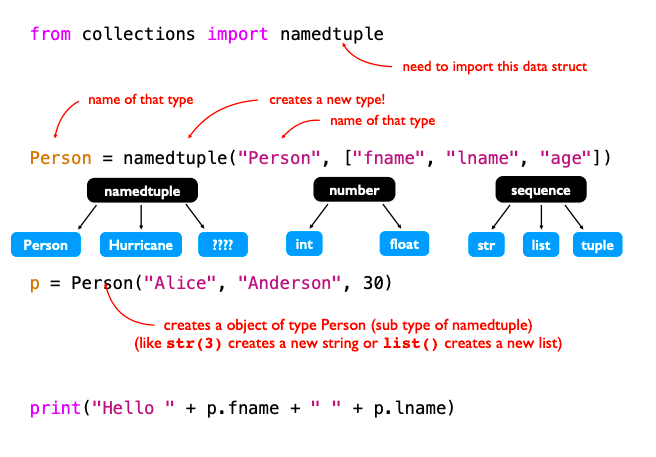

In [34]:
# Write a function to find the average age of the Persons in people
def avg_age(p_list):
    # assume p_list is a list of Persons
    pass

avg_age(people)

28.75